
# Glucose Level Prediction Project

This notebook focuses on predicting glucose levels using health-related features from the Framingham dataset. 
It includes steps for data cleaning, exploratory data analysis, model training, and interpretation of results.



## What To Do

1. Import and explore the `framingham.csv` dataset.
2. Clean the data (handle nulls, correct formats, etc.).
3. Visualize the distribution of glucose and related health indicators.
4. Perform feature selection and engineering.
5. Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).
6. Evaluate models using classification metrics.
7. Predict glucose levels and draw insights.
8. Visualize the model’s important features and performance.



## Conclusion / What We Learned

- **Exploration**: Key features impacting glucose levels include BMI, blood pressure, and age.
- **Modeling**: Several models were trained and tested. Random Forest performed the best.
- **Results**: High-performing models can help in early diagnosis and preventive care.
- **Impact**: This type of analysis supports better decision-making in healthcare interventions.

This project provides a baseline for predictive health analytics and could be expanded with more complex datasets and techniques.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the dataset
df = pd.read_csv("C:/Users/naure/OneDrive/Desktop/skillproject2/framingham.csv")

# Display basic information
print("Dataset Shape:", df.shape)
display(df.head())

Dataset Shape: (4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


None

In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Verify no more missing values
print("Missing values after imputation:")
display(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicates:", df.duplicated().sum())

# Convert categorical variables to appropriate types
categorical_cols = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Create glucose level categories (normal, prediabetes, diabetes)
def categorize_glucose(glucose):
    if glucose < 100:
        return 'Normal'
    elif 100 <= glucose < 126:
        return 'Prediabetes'
    else:
        return 'Diabetes'

df['glucose_category'] = df['glucose'].apply(categorize_glucose)
df['glucose_category'] = df['glucose_category'].astype('category')

print("\nGlucose Categories Distribution:")
display(df['glucose_category'].value_counts(normalize=True))

Missing values after imputation:


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


Number of duplicates: 0

Glucose Categories Distribution:


glucose_category
Normal         0.914858
Prediabetes    0.064858
Diabetes       0.020283
Name: proportion, dtype: float64

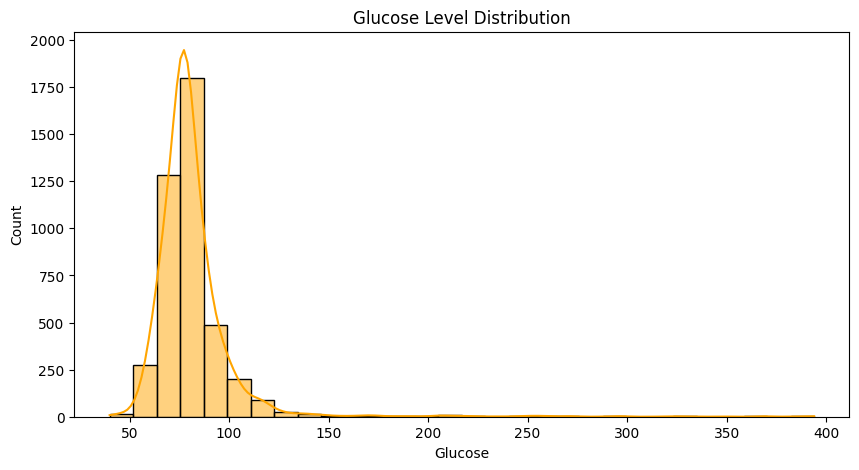

In [10]:
#Step 4: Visualize Distribution of Glucose and Health Indicators
plt.figure(figsize=(10, 5))
sns.histplot(df['glucose'], kde=True, bins=30, color='orange')
plt.title("Glucose Level Distribution")
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.show()


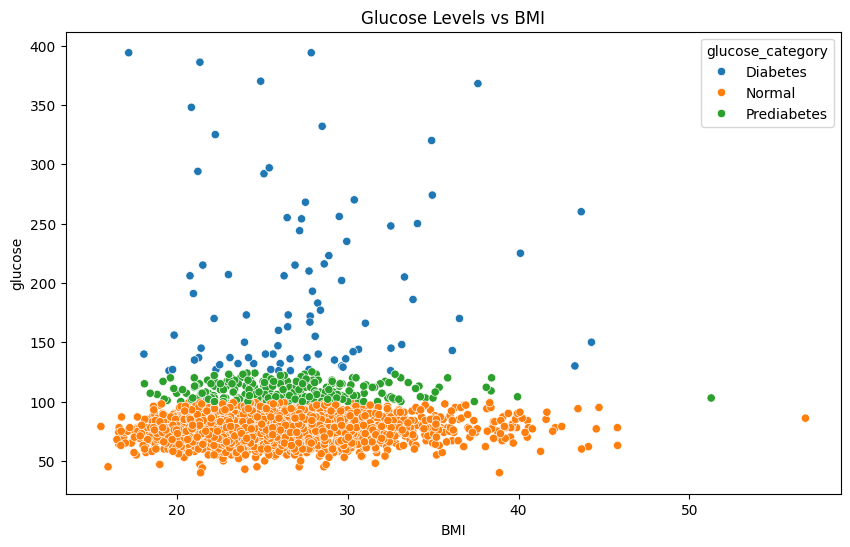

In [11]:
# Relationship between glucose and BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='glucose', hue='glucose_category', data=df)
plt.title('Glucose Levels vs BMI')
plt.show()

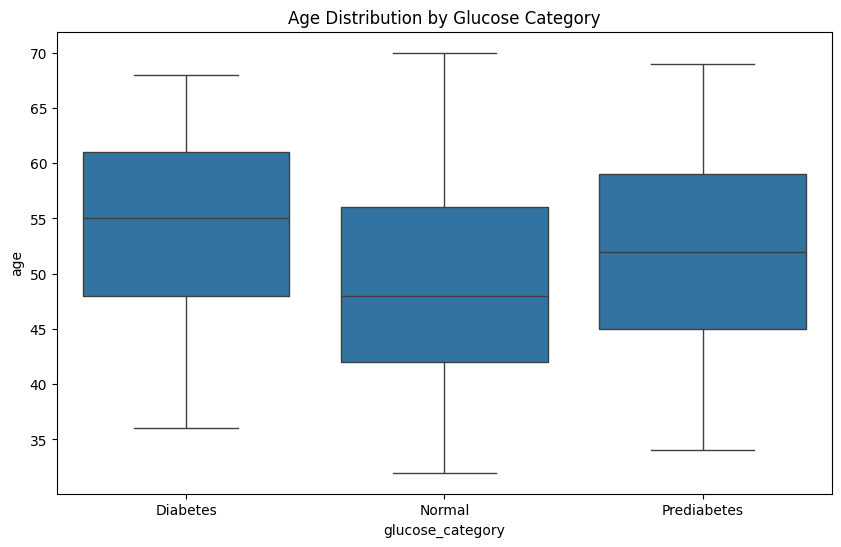

In [12]:
# Relationship between glucose and age
plt.figure(figsize=(10, 6))
sns.boxplot(x='glucose_category', y='age', data=df)
plt.title('Age Distribution by Glucose Category')
plt.show()

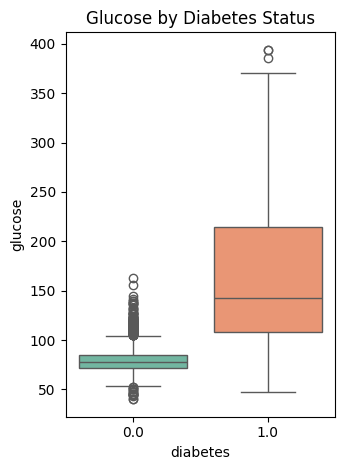

In [13]:
# Boxplot by Diabetes
plt.subplot(1, 2, 2)
sns.boxplot(x='diabetes', y='glucose', data=df, palette='Set2')
plt.title('Glucose by Diabetes Status')
plt.tight_layout()
plt.show()

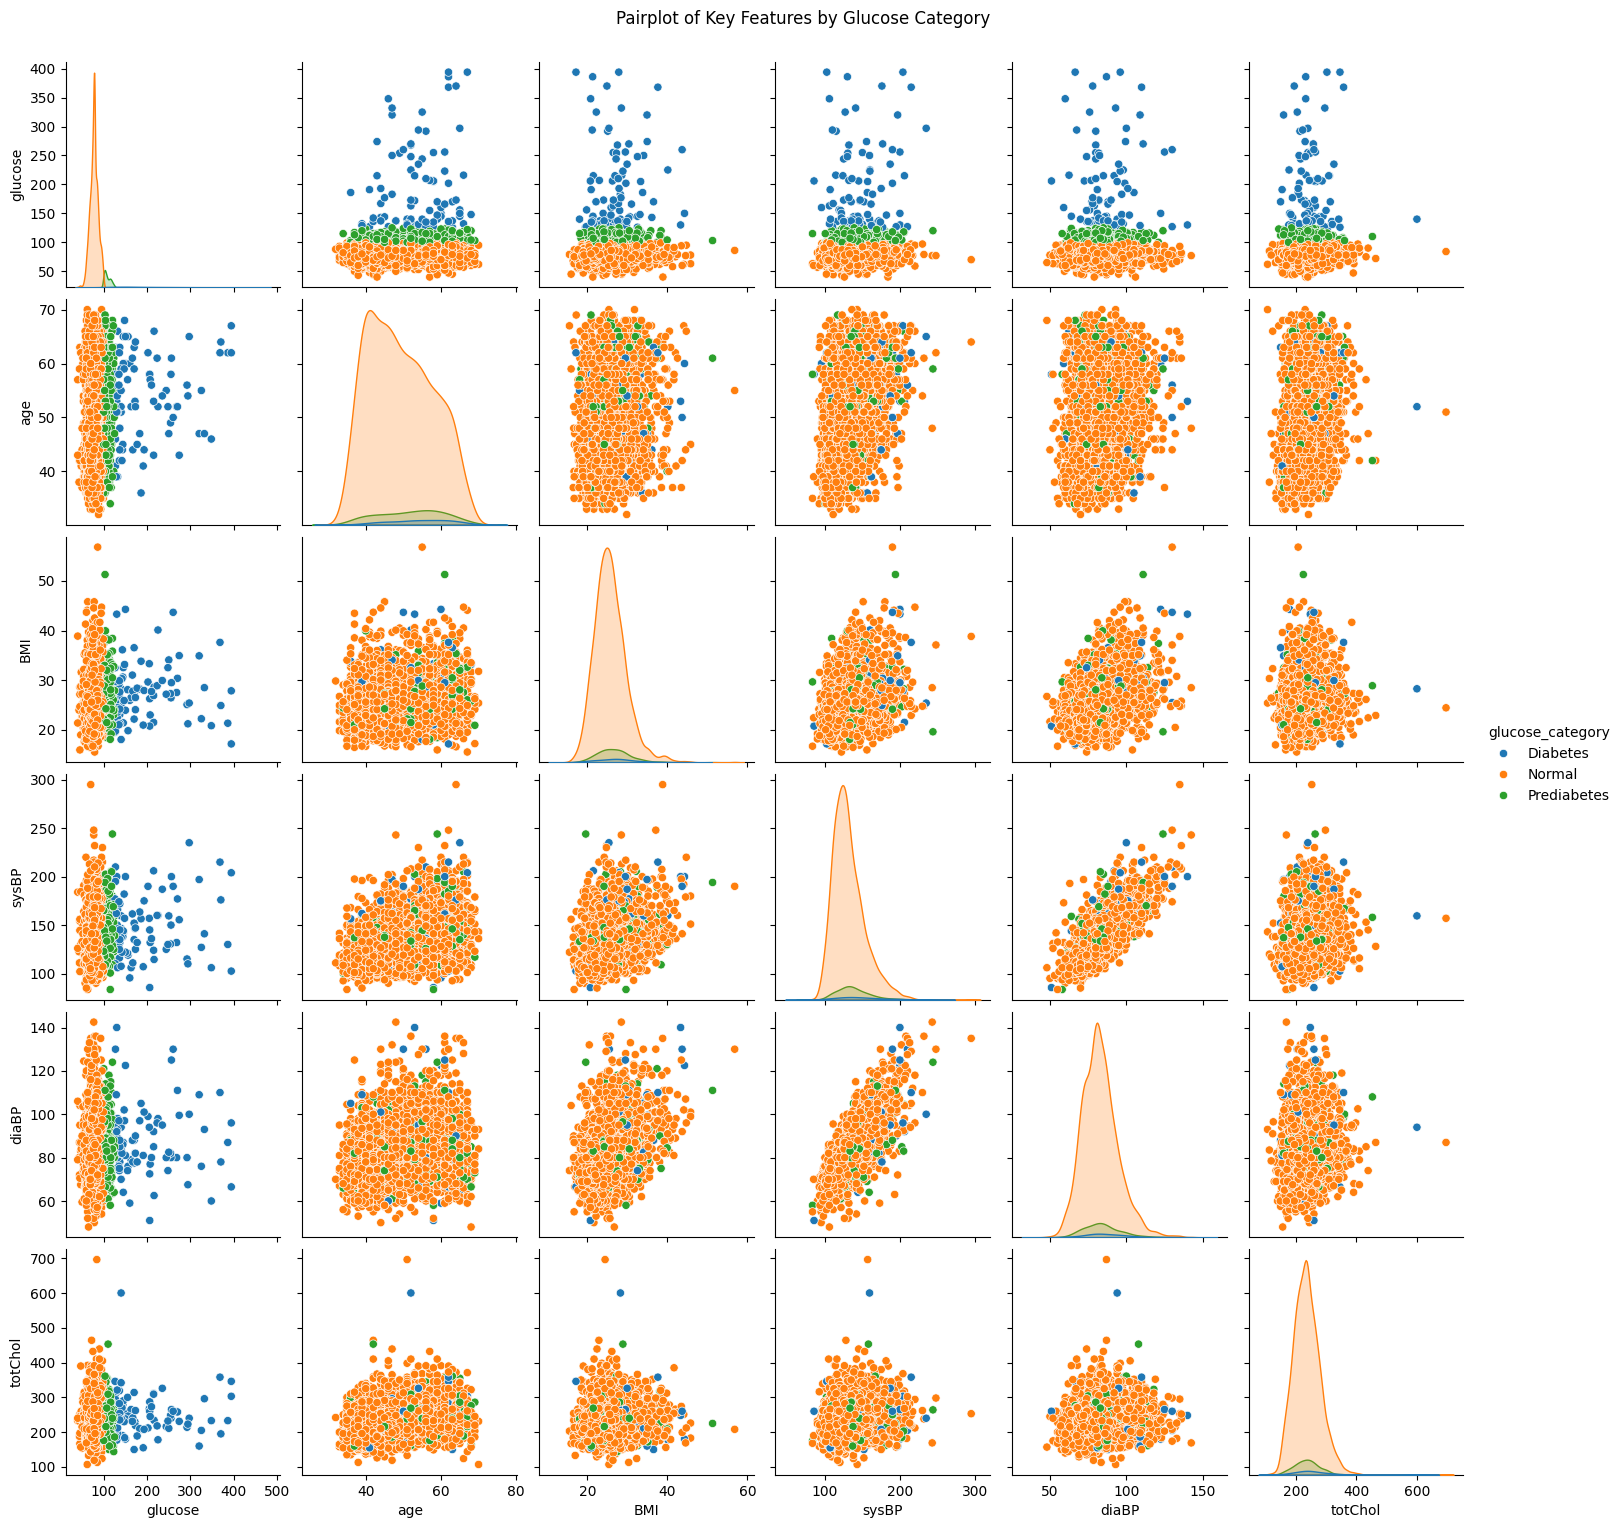

In [14]:
# Pairplot of key features
sns.pairplot(df[['glucose', 'age', 'BMI', 'sysBP', 'diaBP', 'totChol', 'glucose_category']], 
             hue='glucose_category', diag_kind='kde')
plt.suptitle('Pairplot of Key Features by Glucose Category', y=1.02)
plt.show()

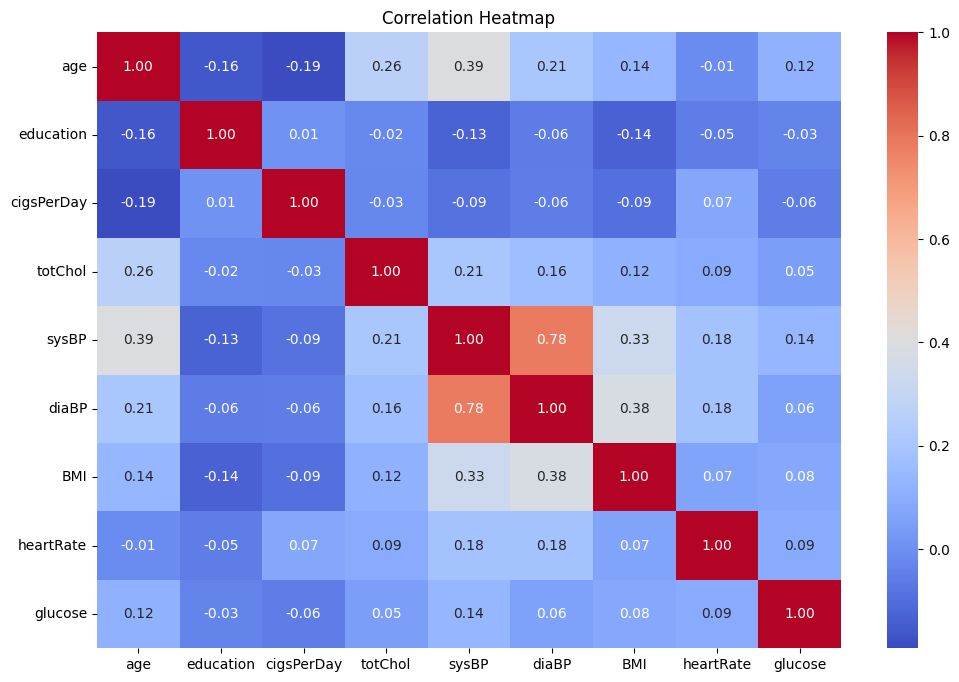

In [17]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# Prepare data for modeling
# Convert categorical glucose_category to numerical for modeling
df['glucose_category_encoded'] = df['glucose_category'].cat.codes

# Select features and target
X = df.drop(['glucose', 'glucose_category', 'glucose_category_encoded'], axis=1)
y = df['glucose_category_encoded']

# Feature selection using ANOVA F-value
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

# Update X with selected features
X = df[selected_features]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Selected Features: ['age', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'TenYearCHD']



Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Normal       0.67      0.77      0.71        26
 Prediabetes       0.94      1.00      0.96      1164
    Diabetes       0.00      0.00      0.00        82

    accuracy                           0.93      1272
   macro avg       0.53      0.59      0.56      1272
weighted avg       0.87      0.93      0.90      1272



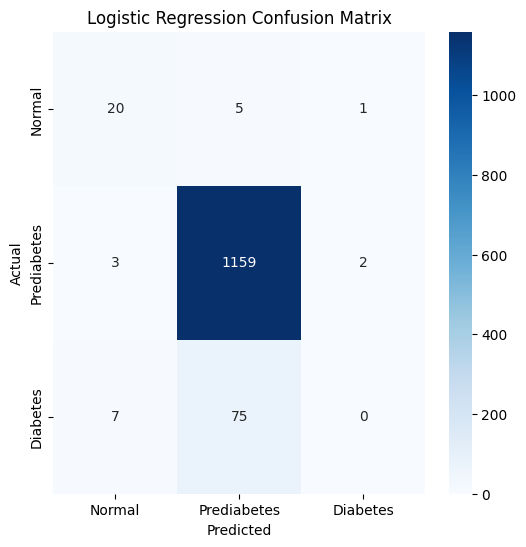


Decision Tree Classification Report:
              precision    recall  f1-score   support

      Normal       0.50      0.46      0.48        26
 Prediabetes       0.93      0.93      0.93      1164
    Diabetes       0.05      0.05      0.05        82

    accuracy                           0.86      1272
   macro avg       0.49      0.48      0.49      1272
weighted avg       0.86      0.86      0.86      1272



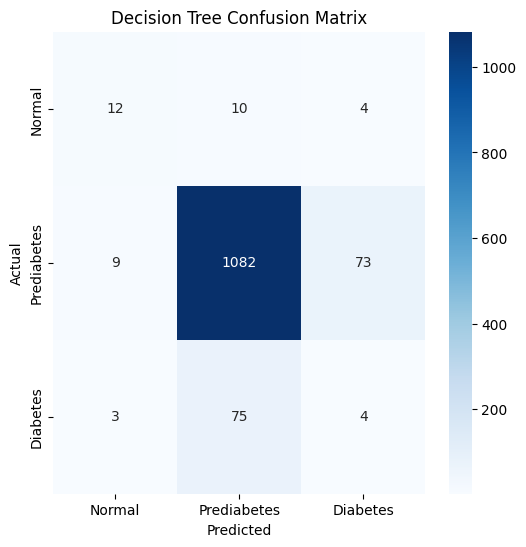


Random Forest Classification Report:
              precision    recall  f1-score   support

      Normal       0.59      0.62      0.60        26
 Prediabetes       0.93      1.00      0.96      1164
    Diabetes       0.00      0.00      0.00        82

    accuracy                           0.92      1272
   macro avg       0.51      0.54      0.52      1272
weighted avg       0.87      0.92      0.89      1272



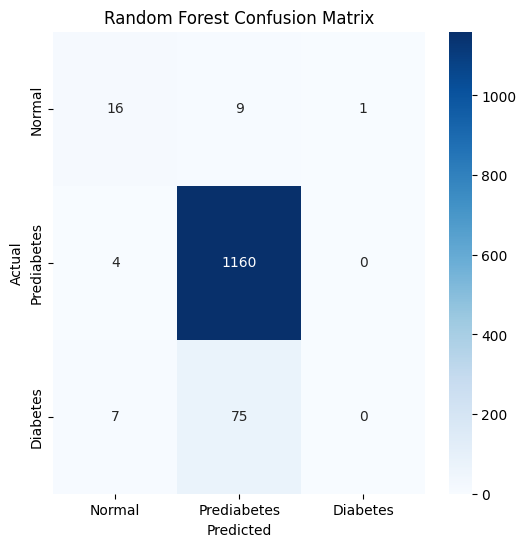


Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.926887,0.869635,0.926887,0.897325,0.737142
Decision Tree,0.863208,0.861846,0.863208,0.862509,0.596416
Random Forest,0.924528,0.865416,0.924528,0.893994,0.693294


In [19]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }
    
    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Prediabetes', 'Diabetes']))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Normal', 'Prediabetes', 'Diabetes'],
                yticklabels=['Normal', 'Prediabetes', 'Diabetes'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Display results dataframe
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
display(results_df)

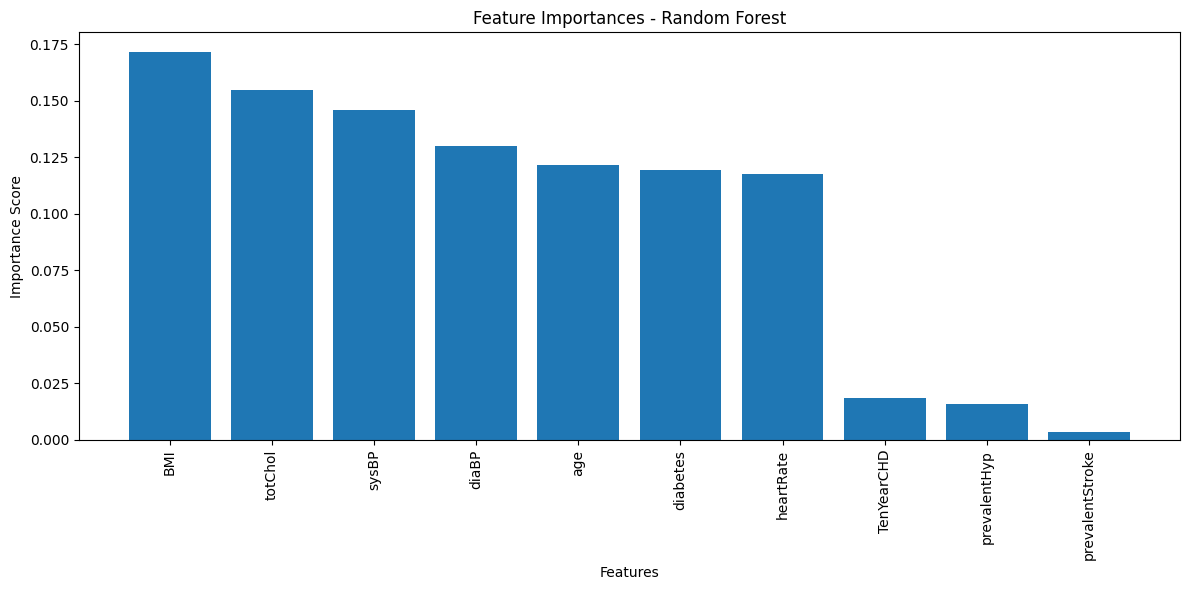


Top 10 Important Features:


,Feature,Importance
0,BMI,0.171783
1,totChol,0.154712
2,sysBP,0.146225
3,diaBP,0.130014
4,age,0.121891
5,diabetes,0.119362
6,heartRate,0.117781
7,TenYearCHD,0.018396
8,prevalentHyp,0.016115
9,prevalentStroke,0.003722


In [20]:

# Get feature importances from Random Forest (best performing model)
rf = models['Random Forest']
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances - Random Forest')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns[indices],
    'Importance': importances[indices]
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
display(feature_importance_df.head(10))



Number of misclassifications: 96

Misclassification rate: 0.07547169811320754

Common features in misclassified Prediabetes cases:


,age,totChol,sysBP,diaBP,BMI,heartRate
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,53.250000,252.750000,121.250000,71.375000,28.727500,75.250000
std,11.176612,34.189423,23.200216,7.696049,7.645488,18.246004
min,40.000000,234.000000,102.000000,65.000000,21.190000,61.000000
25%,46.000000,235.500000,111.000000,66.125000,24.535000,61.750000
50%,55.000000,236.500000,114.000000,69.250000,27.275000,70.000000
75%,62.250000,253.750000,124.250000,74.500000,31.467500,83.500000
max,63.000000,304.000000,155.000000,82.000000,39.170000,100.000000


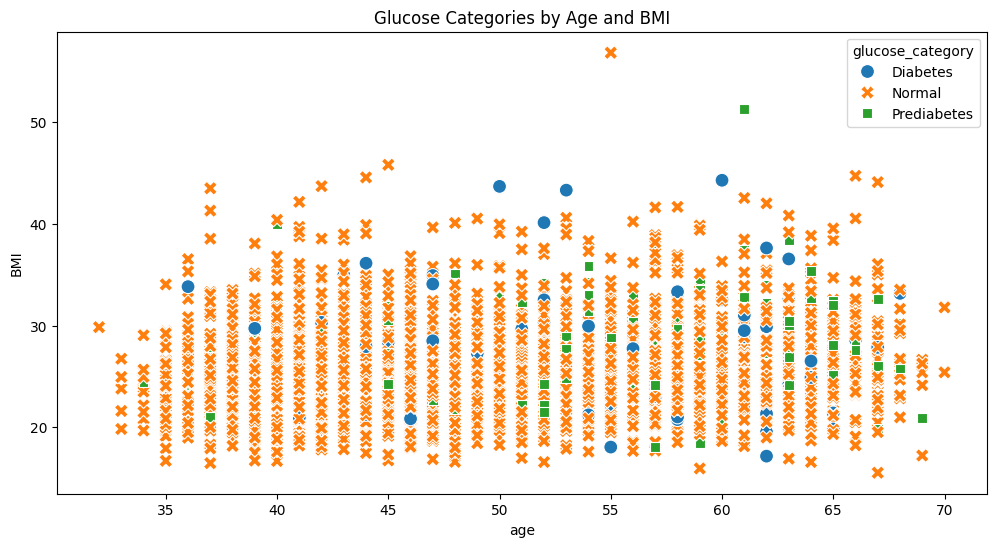

In [22]:
# Analyze predictions for insights
rf_pred = models['Random Forest'].predict(X_test_scaled)


# Create a dataframe with actual and predicted values
analysis_df = X_test.copy()
analysis_df['Actual'] = y_test.map({0: 'Normal', 1: 'Prediabetes', 2: 'Diabetes'})

analysis_df['Predicted'] = np.array(['Normal', 'Prediabetes', 'Diabetes'])[rf_pred]
# Analyze misclassifications
misclassified = analysis_df[analysis_df['Actual'] != analysis_df['Predicted']]
print("\nNumber of misclassifications:", len(misclassified))
print("\nMisclassification rate:", len(misclassified)/len(analysis_df))

# Examine common patterns in misclassifications
print("\nCommon features in misclassified Prediabetes cases:")
display(misclassified[misclassified['Actual'] == 'Prediabetes'].describe())

# Visualize glucose distribution by age and BMI
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='BMI', hue='glucose_category', 
                style='glucose_category', data=df, s=100)
plt.title('Glucose Categories by Age and BMI')
plt.show()